In [1]:
import sys
sys.path.append("../..")

from example import Simulation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
simulation = Simulation()

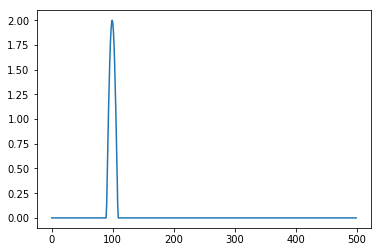

In [5]:
plt.plot(simulation.mpdata.curr.get())

In [6]:
simulation.run()

NotImplementedError: 